로지스틱 회귀
==
- 로지스틱 회귀의 개념
- 소프트맥스
- 분류 성능: accuracy, precesion, recall, f-1, ROC, AUC, recall-precesion

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, \
  precision_recall_curve, roc_curve, auc

%matplotlib inline

## 합격자와 불합격자 공부한 시간


In [0]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [3]:
p, f = len(pass_time), len(fail_time)
p, f

(18, 16)

In [0]:
# 게임한 시간
pass_time_g = [1.5, 2, 2.1,2.6,2.1,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4, 1.3, 1.2]
fail_time_g = [16, 17, 16, 17,10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 18.1]

In [5]:
len(pass_time_g), len(fail_time_g)


(18, 16)

In [0]:
X1 = np.hstack((pass_time,fail_time))
X2 = np.hstack((pass_time_g,fail_time_g))

In [7]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

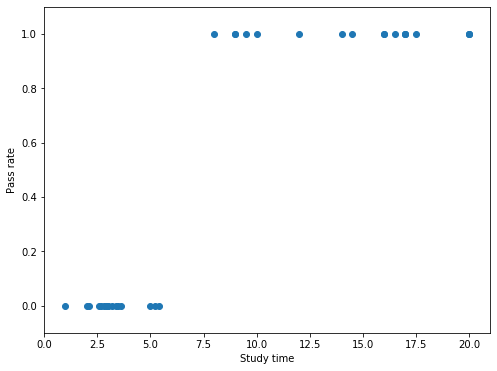

In [9]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X1, y)
# plt.scatter(X2, y, c='r')

plt.show()

In [18]:
X = np.vstack((X1, X2)).T
# X = X1
X

array([[ 8. ,  1.5],
       [ 9. ,  2. ],
       [ 9. ,  2.1],
       [ 9.5,  2.6],
       [10. ,  2.1],
       [12. ,  2.8],
       [14. ,  2.9],
       [14.5,  3. ],
       [16. ,  3.2],
       [16. ,  3.4],
       [16.5,  3.5],
       [17. ,  3.6],
       [17. ,  3. ],
       [17. ,  5. ],
       [17.5,  5.2],
       [20. ,  5.4],
       [20. ,  1.3],
       [20. ,  1.2],
       [ 1. , 16. ],
       [ 2. , 17. ],
       [ 2.1, 16. ],
       [ 2.6, 17. ],
       [ 2.7, 10. ],
       [ 2.8, 12. ],
       [ 2.9, 14. ],
       [ 3. , 14.5],
       [ 3.2, 15. ],
       [ 3.4, 16. ],
       [ 3.5, 16. ],
       [ 3.6, 16.5],
       [ 3. , 17. ],
       [ 5. , 17. ],
       [ 5.2, 17. ],
       [ 5.4, 18.1]])

In [20]:
model = LogisticRegression()
model.fit(X,y)

print(model.coef_)
print(model.intercept_)

[[ 0.58848124 -0.53054635]]
[0.01936337]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
# model.predict([[2],[4],[5],[7]])
model.predict([[19,25],[8.8,1.9]])

array([0, 1])

In [28]:
model.predict_proba([[12,12],[8.8,1.9]])
# model.predict_proba([[2],[4],[5],[7]])

array([[0.32858717, 0.67141283],
       [0.01492088, 0.98507912]])

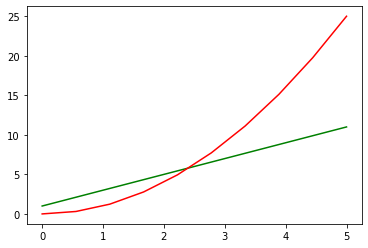

In [17]:
# 그래프 연습
xs = np.linspace(0, 5, 10)
ys = 2*xs +1
plt.plot(xs, ys, c='g')
ys = xs*xs
plt.plot(xs, ys, c='r')

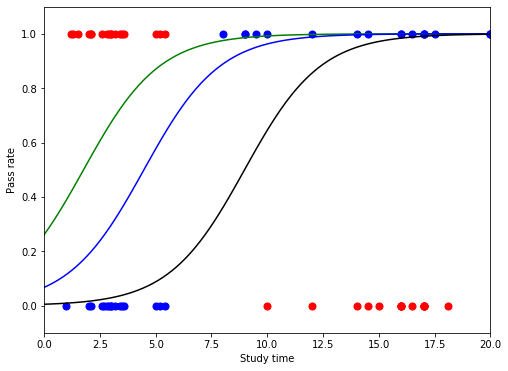

In [31]:
def logreg(z):
    return 1 /(1+np.exp(-z))

a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X[:,0], y, c='b', s=50)
plt.scatter(X[:,1], y, c='r', s=50)
xs = np.linspace(0,21, 100)
ys = logreg(a1*xs +a2*2+ b)
plt.plot(xs, ys, c='g')
ys = logreg(a1*xs +a2*5+ b)
plt.plot(xs, ys, c='b')
ys = logreg(a1*xs +a2*10+ b)
plt.plot(xs, ys, c='k')
plt.show()

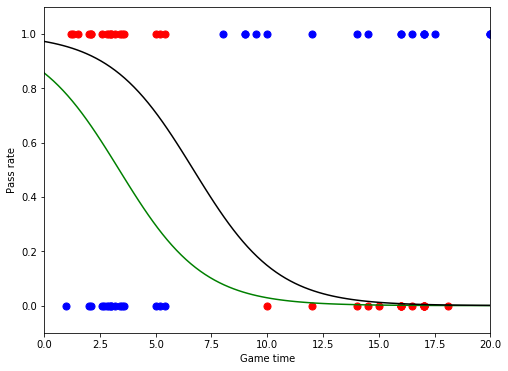

In [0]:
def logreg(z):
    return 1 /(1+np.exp(-z))

a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Game time')
plt.ylabel('Pass rate')
plt.scatter(X[:,0], y, c='b', s=50)
plt.scatter(X[:,1], y, c='r', s=50)
xs = np.linspace(0,21, 100)
ys = logreg(a1*3 +a2*xs+ b)
plt.plot(xs, ys, c='g')
ys = logreg(a1*6 +a2*xs+ b)
plt.plot(xs, ys, c='k')
plt.show()

## 소프트맥스
- 다항 로지스틱스

In [33]:
score = [1,2,3]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.09  0.245 0.665]


# 이진 분류 성능

## 분류를 위한 점수, 분류예측, 실제값

In [0]:
y_score = np.linspace(99, 60, 20).round(2)
y_pred = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]
y_test = [1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0]
print(y_score)

[99.   96.95 94.89 92.84 90.79 88.74 86.68 84.63 82.58 80.53 78.47 76.42
 74.37 72.32 70.26 68.21 66.16 64.11 62.05 60.  ]


In [0]:
pd.DataFrame(list(zip(y_score, y_pred, y_test)), columns=["score","pred",'real'] )

,score,pred,real
0,99.00,1,1
1,96.95,1,0
2,94.89,1,1
3,92.84,1,1
4,90.79,1,0
5,88.74,1,1
6,86.68,1,1
7,84.63,1,0
8,82.58,1,1
9,80.53,0,0


In [0]:
confusion_matrix(y_test, y_pred)

array([[9, 3],
       [2, 6]])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



# ROC로 성능 평가 (맞춘 순서를 평가)


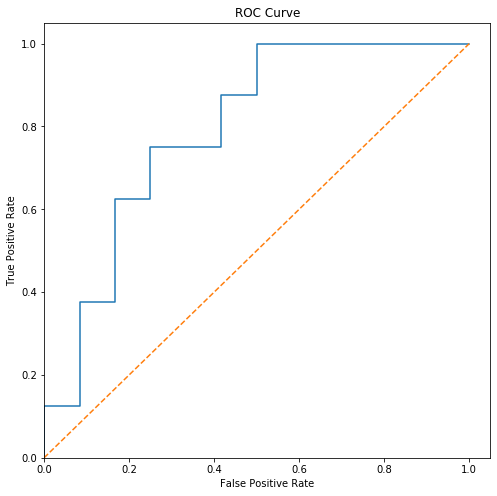

AUC =  0.7917


In [0]:
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC = ", auc(fpr, tpr).round(4))

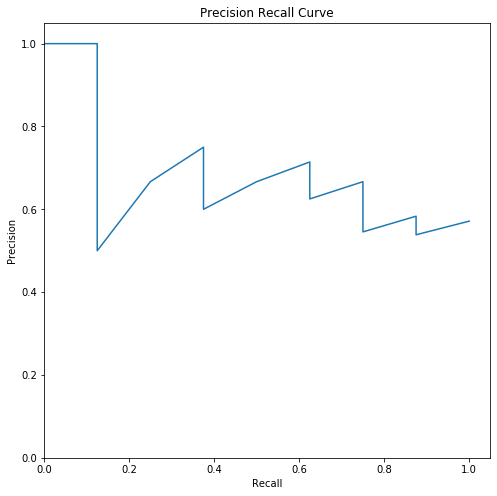

In [0]:
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.figure(figsize=(8,8))
plt.plot(recall,precision)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()